# Analysis of Incarceration Rates Across Countries and Social Attitudes

Serina Li, Rhea Manoharan, Rohit Rungta, James Weichert

Spring 2021

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

<hr>

## Introduction

Countries all around the world have witnessed civil unrest as carceral systems and attitudes towards punishment have increasingly become challenged by both the public and governments alike. From the Arab Spring and Occupy protests in 2010, to recent anti-government demonstrations in India, Iraq, Lebanon, Hong Kong, Latin America, to the Black Lives Matter Movement that continues to ignite world wide protests, the social attitudes towards government and justice have been magnified more than ever. With this in mind, our group will analyze the following research question:&nbsp;To what extent do social attitudes towards government and civil society (e.g. trust in police, official institutions) explain and change with incarceration rates among different countries?

### Why does this matter? 

No matter if it is historical socioeconomic issues or future predictive trends, social attitudes can signify many aspects of a country. It is imperative, especially for policy makers, to understand changes in the beliefs, values and motivations of people. In the research sphere, scientists, sociologists, social psychologists, anthropologists and economists have all used social attitudes as an indicator for the topic of their investigations. Specifically for our project, we wanted to examine the relationship between certain social attitudes and incarceration rate.  Our interest was peaked by a combination of our class discussion on crime control and how other countries conduct their crime control. Moreover, U.S. as supposedly one of the most developed and free countries in the world, the question of why we have the highest incarceration rate intrigued our group. Thus, in the following, we utilize the World Value Survey and the World Prison Brief datas to analyze the relationship between social attitudes and incarceration rates among different countries. For our hypothesis, we will depart from Peter K. Enns's finding in his article, "The Public's Increasing Punitiveness and Its Influence on Mass Incarceration in the United States", that higher 
 hypothesize that more social support towards punitive punishment for crimes will lead to higher incarceration rate. 

<hr>

<h3>Data</h3>

*World Values Survey and World Prison Brief Data*

The World Values Survey is an international research project aiming to provide insight into the social, political, economic, religious, and cultural values of people around the world. For the purposes of this project, we will be relying primarily on survey questions related to attitude towards the police, the moral severity of different categories of crime, and overall trust of government institutions and processes. These categories of questions constitute as close to a stand-in for attitude towards punishment and incarceration regimes as is likely possible to find in a worldwide survey. WVS data can be used freely for non-commercial purposes, giving us easy access to a robust dataset.

The World Prison Brief Survey is a database the provides free access to information about prison systems around the world. The information is updated on a monthly basis and data is derived directly from governmental and official sources. The data we were most interested in was the total prison population rates per 100,000 of the national population, however the survey also covers information such as the use of imprisonment for women and juvelines, the extent of pre-trial, prison overcrowding, and more that would be interesting to analyze for further studies. 

Two drawbacks of both of these datasets are the integrity of the datasets themselves, which could have possible biases from government reporting. In this model and throughout this project, however, we assume that the data we have retrieved is accurate given that they are both reputably cited in literature and draw from official sources. 

*Assembling the Data*

To merge these two datasets, we took only the countries that were represented within both datasets and joined the two using country codes. This was a total of 46 countries. Only relevant columns from the WVS, such as those pertaining to social capital and trust, ethical values, and a select few questions on trust in police and government institutions were kept. Mainly only the incarceration rates were kept from the world prison brief survey data.

EDA was performed, as shown below, to decrease dimensionality and take out columns that may contribute to multicollinearity. Multicollinearity and dimensionality reduction is also discussed within the modeling section. 

<h4><em>World Values Survey (WVS)</em></h4>

In [ ]:
wvs_final = pd.read_csv('final_data/wvs_final.csv')

In [ ]:
wvs_final.iloc[:, 27:].head()

,Q19,Q21,Q23,Q29,Q33_3,Q34_3,Q35_3,Q40,Q45,Q52,...,Q180,Q181,Q191,Q192,Q194,Q195,Country,prisonPopRate,pop2021,Continents
0,1.961155,1.973108,1.961155,3.332997,2.089910,1.913828,2.037924,2.737738,1.609610,3.901198,...,1.676324,1.305694,1.296407,1.124000,1.337662,3.396603,Andorra,55,77.355,Europe
1,1.979063,1.958126,1.981057,3.137643,2.033401,1.562948,2.091966,2.620795,1.414195,2.883117,...,2.141117,1.875758,1.725806,1.606925,1.858617,3.383576,Argentina,230,45605.826,South America
2,1.966354,1.923331,1.971318,3.351230,2.090505,1.702899,2.153718,2.475455,1.531603,3.467482,...,1.848688,1.435025,1.595638,1.321968,1.711161,4.453169,Australia,160,25788.215,Australia
3,1.676819,1.592433,1.657939,2.213542,1.309383,1.183811,1.604219,1.470489,1.253785,3.618410,...,1.700833,1.607500,1.794167,1.795000,1.750833,2.752500,Bangladesh,52,166303.498,Asia
4,1.947222,1.897778,1.927222,2.862550,1.827737,1.186183,1.612506,1.954523,1.131707,3.159942,...,2.037745,2.045768,2.003425,1.923275,2.058736,3.649202,Bolivia,164,11832.940,South America


<h4><em>Incarceration Rates by Country</em></h4>

<p>Data on incarceration rates (prison populations) was sourced from the <a href="https://worldpopulationreview.com/country-rankings/incarceration-rates-by-country">World Population Review</a>, which lists 2021 incarceration rates (in number of prisoners per 100,000 people) for almost all countries in the world. This dataset also provides the 2021 population of each country, which is helpful for contextualizing incarceration trends within the context of a country's population. <a href="https://gist.github.com/tadast/8827699#file-countries_codes_and_coordinates-csv">This publicly-available dataset</a> of country codes was used to map between the WVS data, which identified countries by ISO Alpha-3 code, and the incarceration rates data, which only listed the names of countries. </p>

In [ ]:
incarceration_by_country = pd.read_csv('final_data/incarceration.csv', index_col=0)

In [ ]:
incarceration_by_country.head()

,Country,prisonPopRate,pop2021,Alpha-3 code
0,United States,639,332915.073,USA
1,El Salvador,566,6518.499,SLV
2,Turkmenistan,552,6117.924,TKM
3,Thailand,549,69950.850,THA
4,Palau,522,18.169,PLW


In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = incarceration_by_country['Alpha-3 code'], 
    z = incarceration_by_country['prisonPopRate'], 
    colorscale = 'YlGnBu',
    hovertext = incarceration_by_country['Country'],
    ))

fig.update_layout(
    autosize=False,
    title="Incarceration Rates by Country"
)

pass

In [ ]:
fig.show()

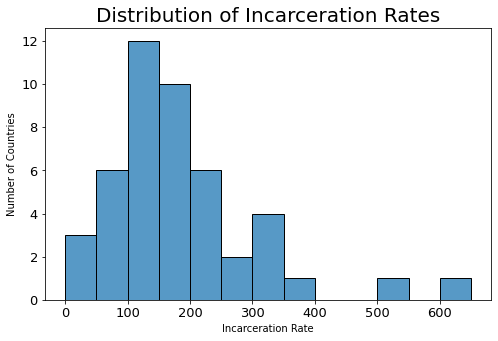

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sb.histplot(wvs_final['prisonPopRate'], bins=np.arange(0,700,50))
ax.tick_params(labelsize=13)
ax.set_xlabel("Incarceration Rate",fontsize=10)
ax.set_ylabel("Number of Countries",fontsize=10)
ax.set_title("Distribution of Incarceration Rates",fontsize=20)

fig.show()

<hr>

## Visualization

### Incarceration by Country

The graph below shows the population versus the 2021 incarceration rates for all the countries that participated in the 7th wave of the world values survey. One bias is that although the wave length was from 2017 to 2020, we only used 2021 incarceration rates. We chose to do this because we wanted to standardize all countries to the present moment, and evaluate incarceration rates as a function of all 3 years of the world values survey length cycle. 

We see several clear outliers of the United States and Thailand, which have disproportional high incarceration rates compared to their population. China is also an outlier with a very large population but relatively low incarceration rate. Nigeria also has the lowest incarceration rate. 

In [ ]:
fig = px.scatter(wvs_final, x='pop2021', y='prisonPopRate', title="Incarceration Rates", 
                 hover_name="Country", labels={'pop2021': '2021 Population','prisonPopRate':'Incarceration Rate'}) 
fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16), 
                                  title={'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

The graph below shows the distribution of Incarceration Rates of the countries that participated within the world values survey. The median incarceration rates appears to be around 100-149. There are two clear outliers- the US at 639 and Thailand with 549.  Other than these two countries, there appears to be an almost normal distribution amongst the other countries. 

Text(0.5, 1.0, 'Distribution of Incarceration Rates')

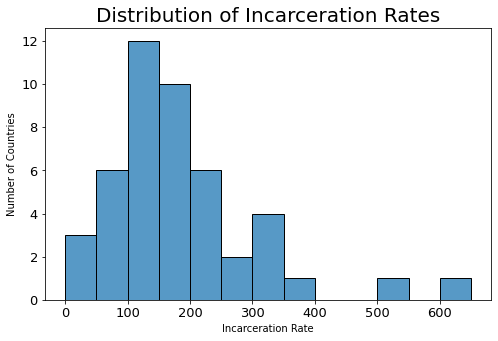

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sb.histplot(wvs_final['prisonPopRate'], bins=np.arange(0,700,50))
ax.tick_params(labelsize=13)
ax.set_xlabel("Incarceration Rate",fontsize=10)
ax.set_ylabel("Number of Countries",fontsize=10)
ax.set_title("Distribution of Incarceration Rates",fontsize=20)

### Confidence: The Police

The histogram below plots the degree of confidence that citizens have in their police for various countries (1 being the most confident and 4 being the least confident). Most citizens seem to have a medium to high amount of trust in their country’s police system. Only a small portion of the countries seem to strongly distrust the police (an average rate of 2.8 or higher).

Text(0.5, 1.0, 'Distribution of Confidence in Police Ratings')

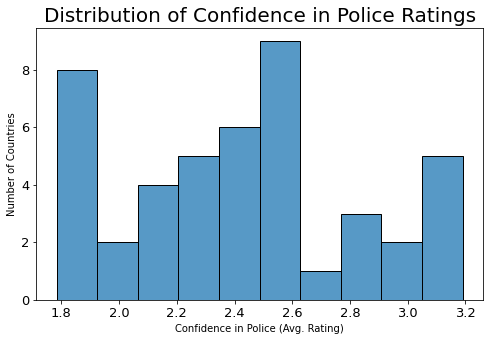

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sb.histplot(wvs_final['Q69'], bins=10)
ax.tick_params(labelsize=13)
ax.set_xlabel("Confidence in Police (Avg. Rating)",fontsize=10)
ax.set_ylabel("Number of Countries",fontsize=10)
ax.set_title("Distribution of Confidence in Police Ratings",fontsize=20)

In this scatterplot, the x-axis represents the confidence in police in a range of 1.8 to 3.2. The y axis represents the incarceration rate of each country. Each point on the scatterplot is a country with the size of the circle as the population of the country. For example, we see that on the left bottom corner, the biggest dot is China with high trust in police and low incarceration rate. In addition, it is very clear that US has the highest incarceration rate despite smaller population than many other countries. Interestingly, another country to point out is Japan. With a relatively high confidence in police, they have a significantly low incarceration rate. This may be due to cultural influence of honor and trust system within a society in general. Lastly, Thailand is also an interesting country to look at with the second highest incarceration rate and relatively small population. 

In [ ]:
fig = px.scatter(wvs_final, x='Q69', y='prisonPopRate', size='pop2021', hover_name="Country", title="Confidence in Police vs. Incarceration Rates")
fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16), 
                                  title={'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

### Confidence: Justice System/Courts

The histogram below shows that there seems to be a homogeneous distribution of countries with high (1), medium (2&amp;3), and low (4) levels of trust in the justice system. Noteably, there were no countries in which its citizens did not have any trust in their justice system (&gt;3.5).

Text(0.5, 1.0, 'Distribution of Confidence in Justice System')

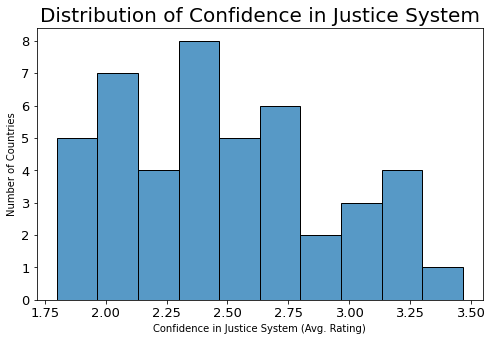

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sb.histplot(wvs_final['Q70'], bins=10)
ax.tick_params(labelsize=13)
ax.set_xlabel("Confidence in Justice System (Avg. Rating)",fontsize=10)
ax.set_ylabel("Number of Countries",fontsize=10)
ax.set_title("Distribution of Confidence in Justice System",fontsize=20)

The scatterplot below shows visual representation of prison population rate and the answers for question 70 which asks for confidence in Justice System/ Courts from a 1-5 scale, and the size of the dots represents the population size. There does not appear to be a clear correlation between population rate and the answers to this question. However, it is worth noting that countries with larger population sizes tend to have relatively more confidence in the justice system overall. 

In [ ]:
fig = px.scatter(wvs_final, x='Q70', y='prisonPopRate', size='pop2021', hover_name="Country", title="Confidence in Justice System vs. Incarceration Rates")
fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16), 
                                  title={'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

### Correlation: Confidence in Police / Criminal Justice

The scatter plot and correlation heat map below shows an relatively strong positive linear correlation between question 69 (The confidence in police) and question 70 (The confidence in the justice system/courts). Countries with less confidence in the police tend to also have less confidence in the justice system and courts. 

In [ ]:
fig = px.scatter(wvs_final, x='Q69', y='Q70', title="Confidence in Police vs. Confidence in Criminal Justice System")

fig.show()

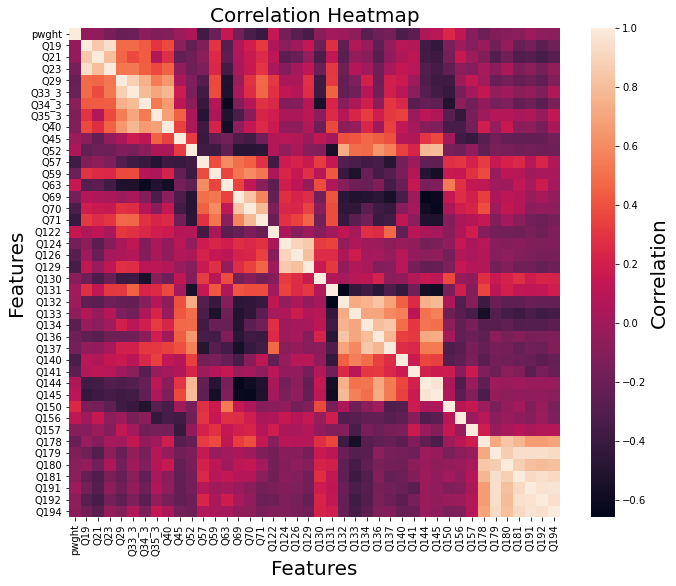

In [ ]:
graphing = wvs_final.iloc[:,26:68].corr()
graphing.head()
f, ax = plt.subplots(figsize=(11, 9))
ax = sb.heatmap(graphing,cbar_kws={'label': 'Correlation'});
plt.xlabel('Features', fontsize=20);
plt.ylabel('Features', fontsize=20);
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.title('Correlation Heatmap', fontsize=20);

The heatmap above shows that most of the features are not highly correlated with each other. This means that each of the features are indeed representing a unique aspect that is not mirrored by another feature. There are, however, certain features that do have some overlap. For example, Q178 – Q194 do seem to be quite correlated, but this is somewhat expected as all of these questions represent the ethical values of a country’s citizens. Similarly, Q132 – Q145 are quite correlated because all of these questions represents people’s perceptions of security.

The heat-map below shows incarceration rates of all countries in the 2021 incarceration rates dataset. Again, the US and Thailand are outliers with extremely high incarceration rates, as well as Turkmenistan.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=incarceration_by_country['Alpha-3 code'], z=incarceration_by_country['prisonPopRate']))

fig.show()

The heat map below illustrates the incarceration rate in terms of continents. We see that North America has the darkest color (aka highest incarceration rate), which make sense because of the significantly high rate in the US. In addition, Africa and Europe has about the same incarceration rate, ranking them at the lowest rate out of all continents. South America as second. Asia and Australia (including New Zealand) are around the second lowest. There is one possible bias that we should watch out for, which is the categorization of the countries into continents. The reason why we decided on continents rather than regions is because it is the most objective and least ethically problematic way to categorize countries. However, one down fall is that regions such as the Middle East, South Asia, South East Asia, and East Asia are all grouped together into Asia, which could mislead future conclusions. With the 46 countries we have from WVS, continents was the only categorization that has "enough" countries in each without presenting any western driven perspective on how to categorize countries. 

<AxesSubplot:ylabel='Continents'>

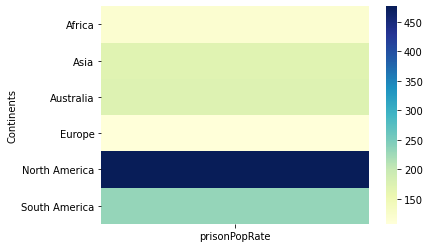

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# pandas pivot
heatmap1_data = pd.pivot_table(wvs_final, values='prisonPopRate', index=['Continents'])
sns.heatmap(heatmap1_data, cmap="YlGnBu")

The World Values Dataset questions are created by social scientists around the world. Although developed in English, the questionnaire is translated to various national languages to be asked to people across various countries. In this project, we are only concerned with the most recent wave of data (Wave 7). This wave spans between 2017-2021 and consists of a total of 290 questions that are subdivided into 14 thematic subsections. The sections that we primarily focused on include Social Values and Norms, Social Capital and Trust, Migration, Security, Postmaterialism, and Ethical Values. The specific questions that we include in our study can be found in the attached PDF titled ‘WVS_7_Codebook’. Each country is sampled upon the decided questionnaire once during this time period. The minimum sample size of all countries is 1200 and the samples are specifically chosen such that they are representative of most people who are age 18 and above. Most of the data is obtained from face-to-face interviews at the respondent’s home. All respondents were informed that participation was purely voluntary and that their answers would be anonymously published online on the World’s Value Survey.&nbsp;Upon downloading and formatting the data, we looked for questions that might be good indicators of social attitudes towards government and civil society. Some countries, specifically, Egypt and China contained a few null values for questions that we wanted to include in our study. Rather than dropping these questions from our study, we decided to replace these null values with the average score across all countries. One very important bias that we must keep in mind when performing our analysis is that the incarceration rates may not be accurate depending on how transparent the countries carceral system is. Also, this may not explain the complexities of what is counted as punishments in different countries.

<hr>

<h3>Modeling</h3>

<p>We decided to create a LASSO and Ridge Regression model and see which one performed better in predicting the incarceration rate of a country. We selected only a portion of the variables after extensive EDA to prevent overfitting. It is also important to note that during the feature selection process, there may be external factors in terms of picking the features because we are manually doing the selection; thus, this could lead to some biases in our results. Additionally, the use of the regularized regression techniques like LASSO and Ridge will necessarily force some coefficients to zero and help prevent overfitting through the use of too many predictors. LASSO was also used because, as explored in the EDA, there tends to be multicollinearity which LASSO can work to regularize.</p>

In [ ]:
wvs_final.columns

Index(['Unnamed: 0', 'Alpha-3 code', 'Unnamed: 0.1', 'B_COUNTRY', 'C_COW_NUM',
       'A_YEAR', 'D_INTERVIEW', 'J_INTDATE', 'FW_END', 'FW_START',
       'K_DURATION', 'Q_MODE', 'N_REGION_ISO', 'N_REGION_WVS', 'N_TOWN',
       'G_TOWNSIZE', 'G_TOWNSIZE2', 'H_SETTLEMENT', 'H_URBRURAL', 'I_PSU',
       'O1_LONGITUDE', 'O2_LATITUDE', 'F_INTPRIVACY', 'E1_LITERACY',
       'W_WEIGHT', 'S018', 'pwght', 'Q19', 'Q21', 'Q23', 'Q29', 'Q33_3',
       'Q34_3', 'Q35_3', 'Q40', 'Q45', 'Q52', 'Q57', 'Q59', 'Q63', 'Q69',
       'Q70', 'Q71', 'Q122', 'Q124', 'Q126', 'Q129', 'Q130', 'Q131', 'Q132',
       'Q133', 'Q134', 'Q136', 'Q137', 'Q140', 'Q141', 'Q144', 'Q145', 'Q150',
       'Q156', 'Q157', 'Q178', 'Q179', 'Q180', 'Q181', 'Q191', 'Q192', 'Q194',
       'Q195', 'Country', 'prisonPopRate', 'pop2021', 'Continents'],
      dtype='object')

In [ ]:
# Selecting Features of Interest
model_data = wvs_final[['Q19', 'Q21', 'Q23', 'Q29', 'Q33_3', 'Q34_3', 'Q35_3', 'Q40',
       'Q45', 'Q52', 'Q57', 'Q59', 'Q63', 'Q69', 'Q70', 'Q71', 'Q122', 'Q124',
       'Q126', 'Q129', 'Q130', 'Q131', 'Q132', 'Q133', 'Q134', 'Q136', 'Q137',
       'Q140', 'Q141', 'Q144', 'Q145', 'Q150', 'Q156', 'Q157', 'Q178', 'Q179',
       'Q180', 'Q181', 'Q191', 'Q192', 'Q194', 'Q195', 'prisonPopRate']]
model_data = model_data.loc[:,model_data.isna().sum()==0]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
# Performing a 70-30 train test split
trainingData, testingData = train_test_split(model_data, train_size=0.7, random_state = 10)
X_train = trainingData.drop(columns=['prisonPopRate'])
y_train = trainingData['prisonPopRate']
X_test = testingData.drop(columns=['prisonPopRate'])
y_test = testingData['prisonPopRate']



# The RMSE will be our metric to evaluate the accuracy of all models
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X))**2))

def per_error(model, X, y):
    return np.mean(abs((abs(y-model.predict(X))/y)))

Lasso Training RMSE: 86.7787032163257
Lasso Training Percent Error: 0.40652496273631306


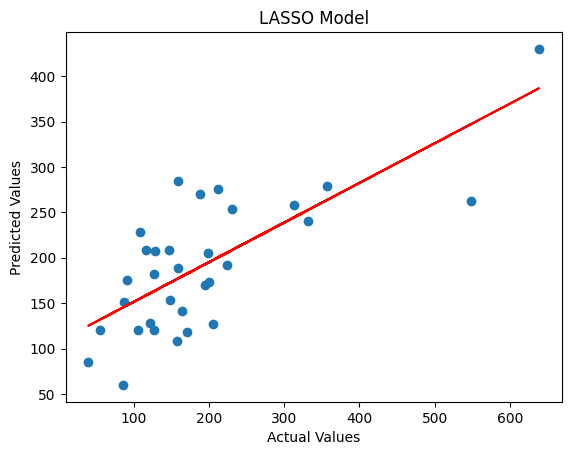

In [ ]:
# create and fit the model
lasso_reg = Lasso()  
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_train)

# Print Errors
print('Lasso Training RMSE: ' + str(rmse_score(lasso_reg, X_train, y_train)))
print('Lasso Training Percent Error: ' + str(per_error(lasso_reg, X_train, y_train)))

# plot the predictions
plt.style.use('default')
plt.scatter(y_train, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

m, b = np.polyfit(y_train, lasso_pred, 1)

plt.plot(y_train, m*y_train + b, "r")

plt.show()

<p>With out initial LASSO model, we see a fairly good positive correlation between actual and predicted incarceration values. In general terms, the model should be capable of making reasonable predictions for incarceration rates based on social values data.</p>

### Cross Validation

In [ ]:
# Performing cross validation to find the best alpha parameter for each model
lasso_model = Lasso() # Initializing model
alphas = np.linspace(1, 0, 10) # Alphas to test
cv_values = [] # Initialize array to store errors
train_values = []

for alpha in alphas: # Finding CV and train errors for each alpha value
    # Setting alpha parameter
    lasso_model.set_params(alpha=alpha)
    # Finding average CV error
    cv_values.append(np.mean(cross_val_score(lasso_model, X_train, y_train, cv=5, scoring=rmse_score)))
    # Fitting model
    lasso_model.fit(X_train, y_train)
    # Finding training error
    train_values.append(rmse_score(lasso_model, X_train, y_train))

min_index = list(cv_values).index(min(cv_values))
best_alpha = alphas[min_index]
lasso_model.set_params(alpha=best_alpha)
lasso_model.fit(X_train, y_train)


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.78305001544504, tolerance: 42.743463999999996

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.29689993195643, tolerance: 29.559776000000003

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 294.931141257548, tolerance: 45.923215384615396

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning:

Objective did not converge. You might want to increase the number of ite

Lasso()

In [ ]:
import plotly.graph_objects as go

print('Lasso Training RMSE: ' + str(rmse_score(lasso_model, X_train, y_train)))
print('Lasso Training Percent Error: ' + str(per_error(lasso_model, X_train, y_train)))
print('Lasso Validation RMSE: ' + str(min(cv_values)))
print("R^2 score: ",r2_score(y_train, lasso_model.predict(X_train)))
print('Optimal Alpha Value: ' + str(best_alpha))
fig = go.Figure()
fig.add_trace(go.Scatter(x = alphas, y = train_values, mode="lines+markers", name="Train"))
fig.add_trace(go.Scatter(x = alphas, y = cv_values, mode="lines+markers", name="CV"))
fig.update_layout(xaxis_title=r"$\alpha$", yaxis_title="CV RMSE", 
                  title_text='Training and CV Errors for Lasso Model', title_x=0.5)
fig.update_layout()

Lasso Training RMSE: 86.7787032163257
Lasso Training Percent Error: 0.40652496273631306
Lasso Validation RMSE: 184.84142440478846
R^2 score:  0.5311391049733525
Optimal Alpha Value: 1.0


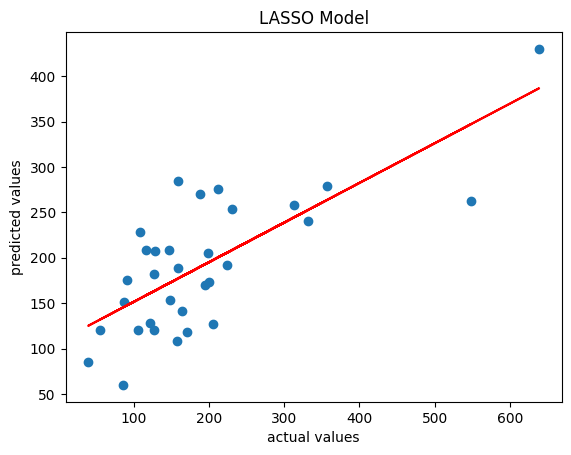

In [ ]:
# plot the predictions
plt.scatter(y_train, lasso_model.predict(X_train))
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')

m, b = np.polyfit(y_train, lasso_model.predict(X_train), 1)

plt.plot(y_train, m*y_train + b, "r")

plt.show()

### Qualitative Analysis of LASSO Model

In [ ]:
model_coefficients = pd.DataFrame(
    {'Predictor': model_data.columns[:-1],
     'LASSO Coefficient': lasso_model.coef_}
)
model_coefficients

,Predictor,LASSO Coefficient
0,Q19,-107.654831
1,Q21,-0.000000
2,Q23,-24.170106
3,Q29,-53.413527
4,Q33_3,0.000000
5,Q34_3,3.067808
6,Q35_3,0.000000
7,Q40,-0.000000
8,Q45,7.414830
9,Q52,-193.149738


In [ ]:
model_coefficients.sort_values('LASSO Coefficient')

,Predictor,LASSO Coefficient
20,Q150,-393.697317
14,Q124,-200.902152
9,Q52,-193.149738
0,Q19,-107.654831
25,Q181,-101.522172
3,Q29,-53.413527
2,Q23,-24.170106
12,Q63,-19.517960
24,Q180,-13.618422
17,Q131,-0.718311


<p>The coefficients with the largest magnitudes in the LASSO model are:</p>
<ul>
<li>Q191 - Justifiable: Violence against other people (1 = never justifiable, 10 = always justifiable)</li> 
<li>Q52 - Frequency you/family (last 12 month): Felt unsafe from crime in your own home (1 = often, 4 = never)</li>
<li>Q124 - Immigration in your country: Increases the crime rate (0 = disagree, 2 = agree)</li>
<li>Q129 - Immigration in your country: Leads to social conflict (0 = disagree, 2 = agree)</li>
<li>Q150 - Freedom and security - Which more important (1 = freedom, 2 = security)</li> 
</ul>

In [ ]:
corrs = []

for c in model_data.columns[:-1]:
    corrs.append(np.corrcoef(model_data[c], model_data['prisonPopRate'])[0][1])
    
model_coefficients['Correlation'] = corrs
model_coefficients

,Predictor,LASSO Coefficient,Correlation
0,Q19,-107.654831,0.071283
1,Q21,-0.000000,0.004033
2,Q23,-24.170106,0.106238
3,Q29,-53.413527,0.249873
4,Q33_3,0.000000,0.323862
5,Q34_3,3.067808,0.222622
6,Q35_3,0.000000,0.233588
7,Q40,-0.000000,0.251305
8,Q45,7.414830,-0.039580
9,Q52,-193.149738,-0.265061


In [ ]:
model_coefficients.sort_values('Correlation')

,Predictor,LASSO Coefficient,Correlation
9,Q52,-193.149738,-0.265061
19,Q145,0.000000,-0.238960
20,Q150,-393.697317,-0.220355
18,Q144,0.000000,-0.192540
12,Q63,-19.517960,-0.192532
8,Q45,7.414830,-0.039580
21,Q156,4.450741,-0.038055
10,Q57,-0.000000,-0.022344
1,Q21,-0.000000,0.004033
25,Q181,-101.522172,0.054166


<p>As we might have anticipated, the LASSO model coefficients with the largest magnitude (absolute value) are the coefficients related to WVS questions about crime, violence, immigration, and freedom. Both ot Q191 ('is violence justifiable?') and Q129 ('does immigration lead to more social conflict?') have large positive coefficients and fairly high positive correlations with the country's prison population. This suggests that countries in which people deem violence more justifiable and view immigration as a source of social conflict may tend to enact harsher or more wide-ranging crime laws, leading to the incarceration of more people.

By contrast, Q150 ('which do you value more, freedom or security?') and Q52 ('how often have you felt unsafe?') both have some of the strongest negative correlations with prison population. This aligns well with our intuition given how the answers for these two questions are coded. For Q150, an answer of '1' indicates the respondent values freedom more than security, while an answer of '2' indicates the respondent values security more than freedom. Thus, the correlation confirms our hypothesis that countries in which people value freedom more than security tend to incarceration fewer people as a percentage of their population. Likewise, Q52 is coded such that a low answer (e.g. '1') indicates that the respondent has "often" felt unsafe while a high answer (e.g. '4') indicates that the respondent has "never" felt unsafe. The negative correlation here suggests that countries where a larger portion of residents feel unsafe tend to imprison larger shares of their population, perhaps as a result to public concerns about safety and security.

One interesting part of the LASSO model is the high negative coefficient for Q124 ('does immigration increase the crime rate?'). Although the Q124 has a positive correlation with prison population, the coefficient here is negative. This contradicts our intuition, which would suggest that societies which view immigration as a cause for crime will tend to imprison a larger percentage of people (likely including immigrants).</p>

<hr>

<h3>Analysis and Case Studies</h3>

<p>In order to better contextualize the relationship between selected social values and incarceration trends across different countries, it is helpful to analyze a handful of particular countries that represent a fairly representative cross-section of the social values-incarcaration continuum. Revisiting the scatter plot from our EDA depicting country-level averages for confidence in police (Q69) vs. country incarceration rates, we have selected five countries which represent different positionalities with respect to social attitudes towards police and the criminal justice and incarceration policies that stem from those attitudes. We have summarized potential explanations for where each country falls on this carceral continuum below.</p>

In [ ]:
fig = px.scatter(wvs_final, x='Q69', y='prisonPopRate', size='pop2021', hover_name="Country", title="Confidence in Police vs. Incarceration Rates")
fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16), 
                                  title={'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})


In [ ]:
fig = px.violin(wvs_final, y="prisonPopRate", points="all", hover_name="Country")
fig.show()

<h4><em>United States</em></h4>

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = incarceration_by_country['Alpha-3 code'], 
    z = incarceration_by_country['prisonPopRate'], 
    colorscale = 'YlGnBu',
    hovertext = incarceration_by_country['Country']
    ))

fig.update_layout(
    autosize=False,
    title="Incarceration Rates by Country - United States"
)

fig.update_geos(
    scope="north america"
)

pass

In [ ]:
fig.show()

In [ ]:
wvs_final[wvs_final["Country"] == "United States"]

,Unnamed: 0,Alpha-3 code,Unnamed: 0.1,B_COUNTRY,C_COW_NUM,A_YEAR,D_INTERVIEW,J_INTDATE,FW_END,FW_START,...,Q180,Q181,Q191,Q192,Q194,Q195,Country,prisonPopRate,pop2021,Continents
43,43,USA,67153.5,840.0,2.0,2017.0,840072298.5,2.017050e+07,201705.0,201704.0,...,2.110031,1.771206,2.406153,1.55642,2.22127,5.511302,United States,639,332915.073,North America


<p>The biggest outlier by far when it comes to incarceration levels relative to population size is the United States. Its incarceration stands at 639 prisoners per 100,000 people (or 3 in every 500 people) and is the highest in the world. Despite the astronomically-high incarceration rate, Americans' confidence in the police averages out to around 2.2 on the 4-point scale, placing it between "not very much [confidence]" and "quite a lot [of confidence]" in the police. </p>
<p>The US' problem with <em>mass incarceration</em> has been widely documented and researched, including in works like <em>The New Jim Crow: Mass Incarceration in the Age of Colorblindness</em> by Michelle Alexander and reports from the <a href="https://www.prisonpolicy.org/reports/pie2020.html">Prison Policy Institute</a> and <a href="https://www.vera.org/downloads/publications/the-new-dynamics-of-mass-incarceration-report.pdf">Vera Institute</a>. </p>

<h4><em>Thailand</em></h4>

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = incarceration_by_country['Alpha-3 code'], 
    z = incarceration_by_country['prisonPopRate'], 
    colorscale = 'YlGnBu',
    hovertext = incarceration_by_country['Country']
    ))

fig.update_layout(
    autosize=False,
    title="Incarceration Rates by Country - Thailand"
)

fig.update_geos(
    scope="asia"
)

pass

In [ ]:
fig.show()

In [ ]:
wvs_final[wvs_final["Country"] == "Thailand"]

,Unnamed: 0,Alpha-3 code,Unnamed: 0.1,B_COUNTRY,C_COW_NUM,A_YEAR,D_INTERVIEW,J_INTDATE,FW_END,FW_START,...,Q180,Q181,Q191,Q192,Q194,Q195,Country,prisonPopRate,pop2021,Continents
37,37,THA,57770.5,764.0,800.0,2018.0,764070750.5,2.017794e+07,201802.0,201712.0,...,1.748318,1.76716,1.895763,1.854643,2.289173,4.5,Thailand,549,69950.85,Asia


In Southeast Asia, the biggest outlier in terms of incarceration levels to population size is Thailand.  Its ratio of incarceration is at 549 prisoners per 100,000 people (or 2.75 in every 500 people) and is the second highest incarceration rate in the world. However, unlike the Americans whose confidence in the police was 2.2 on the 4-point scale, the Thais have lower confidence in their police as shown by the higher surveyed score of 2.44 on the 4-point scale. 

According to the data reported by the <a href="https://newbloommag.net/2019/09/14/thai-carceral-state/"> Thai Department of Corrections</a>, nearly 70% of incarcerations are a result of narcotics due to the crackdown by the Thai government in 2003. Additionally, Thailand’s incarceration rate of women is the highest in the world (even more than the United States). There is lack of public data for the reasons behind the incarceration of women but have been linked to drugs and sex work. 

<h4><em>China</em></h4>

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = incarceration_by_country['Alpha-3 code'], 
    z = incarceration_by_country['prisonPopRate'], 
    colorscale = 'YlGnBu',
    hovertext = incarceration_by_country['Country']
    ))

fig.update_layout(
    autosize=False,
    title="Incarceration Rates by Country - China"
)

fig.update_geos(
    scope="asia"
)

pass

In [ ]:
fig.show()

In [ ]:
wvs_final[wvs_final["Country"] == "China"]

,Unnamed: 0,Alpha-3 code,Unnamed: 0.1,B_COUNTRY,C_COW_NUM,A_YEAR,D_INTERVIEW,J_INTDATE,FW_END,FW_START,...,Q180,Q181,Q191,Q192,Q194,Q195,Country,prisonPopRate,pop2021,Continents
7,7,CHN,11366.5,156.0,710.0,2018.0,156701518.5,2.018076e+07,201810.0,201807.0,...,1.498842,1.600331,1.634348,1.324834,1.504478,5.518028,China,121,1444216.107,Asia


China’s incarceration stands at 121 prisoners per 100,000 people (or 0.6 in every 500 people). The people in China have high confidence in their police as shown by the score of 1.87 on the 4-point scale. 

Although its incarceration rate as of 2017 is not as alarming as countries such as Thailand or the United States, recent news about China’s <a href="https://www.nytimes.com/2019/08/31/world/asia/xinjiang-china-uighurs-prisons.html "> imprisonment of Muslim minorities</a> will increase China’s incarceration rates. This swell of imprisonment is due to the Chinese government’s mission to convert the Muslim minorities into loyalists of the party.

Moreover, another aspect of what could explain China's low incarceration rate is the fact that data may not be perfectly reliable due to the fact that the government is not transparent about these issues. 

<h4><em>Russia</em></h4>

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = incarceration_by_country['Alpha-3 code'], 
    z = incarceration_by_country['prisonPopRate'], 
    colorscale = 'YlGnBu',
    hovertext = incarceration_by_country['Country']
    ))

fig.update_layout(
    autosize=False,
    title="Incarceration Rates by Country - Russia"
)

fig.update_geos(
    scope="europe"
)

pass

In [ ]:
fig.show()

In [ ]:
wvs_final[wvs_final["Country"] == "Russia"]

,Unnamed: 0,Alpha-3 code,Unnamed: 0.1,B_COUNTRY,C_COW_NUM,A_YEAR,D_INTERVIEW,J_INTDATE,FW_END,FW_START,...,Q180,Q181,Q191,Q192,Q194,Q195,Country,prisonPopRate,pop2021,Continents
35,35,RUS,55069.5,643.0,365.0,2017.0,643070905.5,2.017115e+07,201712.0,201711.0,...,3.641217,2.425653,2.077141,1.886621,2.416374,4.562613,Russia,341,145912.025,Asia


Russia’s incarceration stands at 341 prisoners per 100,000 people (1.7 in every 500 people). Russians’ confidence in their police is 2.54 on the 4-point scale, placing it between “not very much confidence” and “quite a lot of confidence” in their police. 

The lower rate of incarceration can be attributed to various factors such as alternative penalties for minor crimes and demographic changes in Russia’s population. However, the rate of recidivism in Russian prisons are quite high, at <a href="https://www.osw.waw.pl/en/publikacje/osw-commentary/2019-02-07/russia-behind-bars-peculiarities-russian-prison-system "> 63% of prisoners</a> being reoffenders. 


<h4><em>Mexico</em></h4>

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = incarceration_by_country['Alpha-3 code'], 
    z = incarceration_by_country['prisonPopRate'], 
    colorscale = 'YlGnBu',
    hovertext = incarceration_by_country['Country']
    ))

fig.update_layout(
    autosize=False,
    title="Incarceration Rates by Country - Mexico"
)

fig.update_geos(
    scope="north america"
)

pass

In [ ]:
fig.show()

In [ ]:
wvs_final[wvs_final["Country"] == "Mexico"]

,Unnamed: 0,Alpha-3 code,Unnamed: 0.1,B_COUNTRY,C_COW_NUM,A_YEAR,D_INTERVIEW,J_INTDATE,FW_END,FW_START,...,Q180,Q181,Q191,Q192,Q194,Q195,Country,prisonPopRate,pop2021,Continents
24,24,MEX,40309.0,484.0,70.0,2018.0,4.847009e+08,2.018029e+07,201805.0,201801.0,...,2.974419,2.642982,2.38989,2.33392,2.492398,3.635673,Mexico,158,130262.216,South America


In Central America, Mexico’s incarceration rate is lower than statistically significant countries such as Cuba, El Salvador, and Panama. Mexico’s incarceration rate stands at 158 prisoners per 100,000 people (0.79 in every 500 people). The people’s confidence in their police is low, with an average of 3.19 on the 4-point scale. 

One of the reasons for Mexico’s lower incarceration rate is due to a <a href="https://www.nytimes.com/2020/01/30/world/americas/mexico-violence-reform.html"> reform in its criminal justice</a> system in 2016. These reforms created more transparency in the courts, raised the standards of evidence, and granted judges more authority in deciding to keep or toss out charges. This stronger process of due process increased the public’s faith in the rule of law, as previously mentioned, but the downside to this reform is that it made it more difficult to put people behind bars and making these charges stick.

<hr/>

The United States has the highest incarceration levels in the world, with 639 prisoners per 100,000 people. The second highest prisoner population can be found in Thailand, second to the US, with 549 prisoners per 100,000 people. What’s notable about Thailand’s prisoners is the fact that it incarcerates women at the highest rate in the world, even more so than the United States.
w
Although Russia’s incarceration rate is lower at 341 prisoners per 100,000 people, its rate of recidivism is very high with 63% of its prisoners being reoffenders. Mexico’s incarceration rate of 158 prisoners per 100,000 people is due to its judiciary reforms in 2016, making it harder for the system to prove defendants’ guilts and assigning sentences. Lastly, China’s low incarceration rate is not reflective of the recent events of imprisonment of its Muslim minorities. Author Chris Buckley reported that with the inclusion of this recent event, China’s incarceration rates can surpass that of the United States.

<hr>

## Conclusion

The World Values Survey is one of the most astonishing data set that has ever created. Measuring values have often been questioned in terms of its objectiveness and methodology; however, the WVS has carefully created a comprehensive way to measure individual values world wide. Our project was able to create a LASSO regression model to predict the incarceration rates of a country using the WVS data on social attitudes towards institutions. Upon removing highly correlated questions from the WVS, the model achieved an RMSE of 185 and an R squared of 0.53. With the result, we were able to analyze and focus on some individual case studies on countries with unusually high or low incarceration rates. 

A few conclusions can be drawn from our investigation:

First, in terms of confidence in police and incarceration rate, notwithstanding the U.S. and Thailand (outliers), there is no clear correlation between confidence in police and incarceration rate. If anything, there seems to be a slight positive correlation between negative attitudes towards police and prison populations, which would contradict the hypothesis that countries with more confidence in the police tend to be more amenable to larger incarceration rates or legal systems that lead to the imprisonment of more citizens. In this way, confidence in police could have been viewed as a result of higher incarceration rates, as citizens perceive that police are 'doing their job' in imprisoning criminals. On the other hand, low confidence in the police combined with high incarceration rates could suggest that citizens believe that too many people are being imprisoned and that the police are not focusing on catching those individuals who present the greatest risk/threat to society.

Second, using social attitudes to predict incarceration rate was indeed successful in our analysis; however, there are some risks to be considered. For instance, the assumption that public opinion will sway policies, in this case, policies in terms of incarcerations may not always be true. Depending on the type of regimes each country is in, public opinion may not matter as much. For instance, here in the U.S. public opinions plays a huge role in terms of passing laws because politicians have the incentive to listen to the public if they want to be reelected; however, in countries such as China, public opinion does not affect the government. The reason for such is because China is an authoritarian regime that has a one party system. This is not to say that all authoritarian regime does not take into account public opinions. Countries such as Singapore, which has garnered a name of "Asian Democracy", has a multiple party system. 

### Potential Gaps

There are several potential gaps within the datasets used themselves. As mentioned in the data section previously, we modeled this project under the assumption that the datasets themselves had reliable and consistent reporting from the governmental or official reportings that they came from. Given that all governments have vastly different reasons and structures of incarceration, it would be interesting to create future models that looks at specific types of incarceration rates (amongst minorities, for specific offenses, etc). As of now, the model does not take these differences into account. 

### Legal, Policy, and Ethical Implications

The ethical implications of correlating world values with incarceration rates is that it may be interpreted as causal relationships. More research is needed to carefully establish such a connection, especially in the creation of an algorithm that deals with something as sensitive as incarceration and criminal justice. As stated above, we found countries that value freedom more than security tend to incarceration fewer people as a percentage of their population. We also found countries where a larger portion of residents feel unsafe tend to imprison larger shares of their population. Although it is unclear whether change in general values can directly affect policy, or vise versa (at least in the United States), it is still a worthwhile consideration for policymakers interested in changing the carceral system to implement within the rhetoric and legal discussion surrounding the carceral system. Moreover, the data that is used are real life data with real life implications for individuals who are surveyed or collected the data on. When performing any type of analysis that uses real life data, it is imperative to consider the ethical implications of how might our findings impact these individuals. For instance, although this project is only for a class, doing prediction on incarceration rates that could lead to policy makings may negatively affect minority groups within different communities. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7022dc0f-72aa-4548-a103-cf93a49e1681' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>